# Laptop Price Prediction

For Price prediction we use 3 Algorithms and Choose the best for calculating the Laptop Price

1. LinearRegression
2. DecisionTreeRegressor
3. KNeighborsRegressor

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by Score and r2_score metrics

Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Visualization

Step 3:Data Training

Step 4: Importing Models

Step 5:Importing Pipeline to Connect the Steps

Step 6:Training our all three models by using pipeline

Step 7: Performance Evaluation

# Data Exploration

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('laptop_prices.csv')

In [5]:
df.sample(5)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
2628,MSI,Intel i3,16,1TB HDD,Nvidia GTX 1650,13.3,3840x2160,7.2,1.72,Linux,1709.07
11535,Acer,AMD Ryzen 5,64,1TB SSD,Nvidia GTX 1650,16.0,1366x768,9.3,3.30,macOS,2331.86
1585,Razer,Intel i5,8,1TB SSD,Nvidia RTX 3080,15.6,2560x1440,5.7,2.33,Linux,1777.04
7220,HP,AMD Ryzen 7,8,1TB SSD,AMD Radeon RX 6600,14.0,1920x1080,7.5,2.71,Windows,1373.81
4158,Lenovo,AMD Ryzen 5,4,2TB SSD,Nvidia RTX 3080,16.0,2560x1440,8.5,2.30,Linux,1359.58


In [6]:
df.shape

(11768, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [8]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [9]:
df['RAM (GB)'].unique()

array([64,  4, 32,  8, 16], dtype=int64)

In [10]:
df['Processor'].unique()

array(['AMD Ryzen 3', 'AMD Ryzen 7', 'Intel i5', 'Intel i3',
       'AMD Ryzen 9', 'AMD Ryzen 5', 'Intel i9', 'Intel i7'], dtype=object)

In [11]:
df['Brand'].unique()

array(['Apple', 'Razer', 'Asus', 'Lenovo', 'Acer', 'Dell', 'Microsoft',
       'HP', 'Samsung', 'MSI'], dtype=object)

In [12]:
df['GPU'].unique()

array(['Nvidia GTX 1650', 'Nvidia RTX 3080', 'Nvidia RTX 3060',
       'AMD Radeon RX 6600', 'Nvidia RTX 2060', 'AMD Radeon RX 6800',
       'Integrated'], dtype=object)

In [13]:
df['Operating System'].unique()

array(['FreeDOS', 'Linux', 'Windows', 'macOS'], dtype=object)

In [14]:
df['Resolution'].unique()

array(['2560x1440', '1366x768', '3840x2160', '1920x1080'], dtype=object)

In [15]:
df['Storage'].unique()

array(['512GB SSD', '1TB SSD', '2TB SSD', '256GB SSD', '1TB HDD'],
      dtype=object)

In [16]:
df['Screen Size (inch)'].unique()

array([17.3, 14. , 13.3, 16. , 15.6])

# Data Visualization

In [17]:
import seaborn as sns

<Axes: >

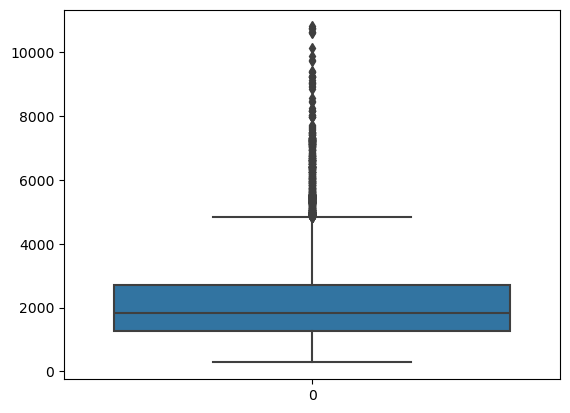

In [18]:
sns.boxplot(df['Price ($)'])

As we can see in the above diagram there are some outliers in our Data but we can't remove them from our Dataset because the removing that much outliers can effect our score and accuracy and also may we lost some important datas

# Data Training

In [19]:
# To Split the data into Training and Testing datasets we use train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [20]:
# Here xtrain and xtest have the features and ytrain and ytest have the target. i.e.. "Price ($)"
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns='Price ($)',axis=1),df['Price ($)'],test_size=0.2)
# Ratio used for splitting training and testing data is 8:2

In [21]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(9414, 10)
(2354, 10)
(9414,)
(2354,)


Now we use OneHotEncoder to convert out Categorical columns into numerical values

In [22]:
# Importing OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

Now we import ColumnTransformer because it is a powerful tool that allows us to apply different preprocessing and feature extraction pipelines to different subsets of features within our dataset. 

In [23]:
# importing ColumnTransformer from sklearn.compose
from sklearn.compose import ColumnTransformer

In [24]:
clf1=ColumnTransformer(transformers=[
    ('OneHotEncoder',OneHotEncoder(),[0,1,2,3,4,5,6,9])
],remainder='passthrough')

# Importing Models

In [25]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [26]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

# Importing Pipeline to Connect the Steps

In [27]:
# Importing Pipeline from sklearn.pipeline
from sklearn.pipeline import Pipeline

# Training our all three models by using pipeline


1. LR = LinearRegression
2. DTR = DecisionTreeRegressor
3. KNR = KNeighborsRegressor

In [28]:
LR=Pipeline([
    ('clf1',clf1),
    ('LinerRegression',lr)])

In [29]:
LR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6, 9])])),
                ('LinerRegression', LinearRegression())])

In [30]:
DTR=Pipeline([
    ('clf1',clf1),
    ('DecisionTreeRegressor',dtr)])

In [31]:
DTR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6, 9])])),
                ('DecisionTreeRegressor', DecisionTreeRegressor())])

In [32]:
KNR=Pipeline([
    ('clf1',clf1),
    ('KNeighborsRegressor',knr)])

In [33]:
KNR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6, 9])])),
                ('KNeighborsRegressor', KNeighborsRegressor())])

# Performance Evaluation

In [34]:
from sklearn.metrics import r2_score

In [35]:
pred1=LR.predict(xtest)
pred2=DTR.predict(xtest)
pred3=KNR.predict(xtest)

In [36]:
r21=r2_score(ytest,pred1)
r22=r2_score(ytest,pred2)
r23=r2_score(ytest,pred3)

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t       r2_score \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format( r21, LR.score(xtrain,ytrain)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  r22, DTR.score(xtrain,ytrain)))
print("""KNeighborsRegressor \t\t {:.4f} \t \t\t {:.4f}""".format(r23, KNR.score(xtrain,ytrain)))


Model			       r2_score 		 Accuracy of the model
Linear Regression 		 0.8808 	 		 0.8840
Decision Tree Regressor		 0.9539 	 		 1.0000
KNeighborsRegressor 		 0.6509 	 		 0.7779


Conclusion: 
1. Accuracy of Regression models- Linear regression, DecisionTreeRegressor and KNeighbors is not same.
2. Accuracy and r2_score  of decision tree regressor is higher
3. KNeighborsRegressor has the least Accuracy and the least r2_score which means KNeighborsRegressor is least effective for this model in compare to the other models
4. DecisionTreeRegressor is the best model to predict Laptop Price 

# So, We choose the Model(DecisionTreeRegressor) to predict our Laptop price for better Result

In [41]:
import pickle
pickle.dump(DTR,open('Laptop Price Prediction.pkl','wb'))